### How to plot learning curve and confusion matrix in TensorFlow 2.0

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

### Import the Fashion MNIST dataset

In [23]:
mnist = keras.datasets.fashion_mnist

In [24]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [25]:
class_names = ['top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [26]:
mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [27]:
X_train = X_train/255.0
X_test = X_test/255.0

### Build the model

Building the nueral network requires configuring the layers of model,then compiling the model.

In [29]:
model = Sequential()
# input layer
model.add(Flatten(input_shape=(28,28)))

# Hidden layer with activation function is relu 
model.add(Dense(128,activation='relu'))

# output layer with activation function is softmax
model.add(Dense(10,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Train the model

In [32]:
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_split=0.20)

Epoch 1/10
480/480 [==============================] - 1s 3ms/step - loss: 0.5585 - accuracy: 0.8078 - val_loss: 0.4318 - val_accuracy: 0.8493
Epoch 2/10
480/480 [==============================] - 1s 2ms/step - loss: 0.4070 - accuracy: 0.8566 - val_loss: 0.3913 - val_accuracy: 0.8622
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3668 - accuracy: 0.8700 - val_loss: 0.3781 - val_accuracy: 0.8662
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8782 - val_loss: 0.3517 - val_accuracy: 0.8732
Epoch 5/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8840 - val_loss: 0.3449 - val_accuracy: 0.8773
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3039 - accuracy: 0.8895 - val_loss: 0.3691 - val_accuracy: 0.8662
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2905 - accuracy: 0.8944 - val_loss: 0.3411 - val_accuracy: 0.8800
Epoch 

this is training accuracy 

### calculating our test data accuracy

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8759

##### Here is overfitting because training accuracy is greater than testing accuracy_score now lets plot the ploting Learning Curve and Confusion Matrix in TensorFlow 2.0 to see overfitting

for learning curve we use tensorflow library and for confusion matrix we use mlextend library 

In [35]:
history

In [36]:
history.history

{'loss': [0.5585379004478455,
  0.4069698452949524,
  0.36683234572410583,
  0.33855757117271423,
  0.3177560865879059,
  0.30393344163894653,
  0.2905115485191345,
  0.2801719903945923,
  0.2664048373699188,
  0.25651785731315613],
 'accuracy': [0.8078333139419556,
  0.8565833568572998,
  0.8699583411216736,
  0.8782291412353516,
  0.8840208053588867,
  0.8895416855812073,
  0.8943541646003723,
  0.8963750004768372,
  0.9027916789054871,
  0.9057083129882812],
 'val_loss': [0.43183523416519165,
  0.3912959694862366,
  0.378108412027359,
  0.35165882110595703,
  0.34492358565330505,
  0.36909008026123047,
  0.3411051332950592,
  0.3271265923976898,
  0.3281569480895996,
  0.3302302658557892],
 'val_accuracy': [0.8493333458900452,
  0.8621666431427002,
  0.8661666512489319,
  0.8731666803359985,
  0.8773333430290222,
  0.8662499785423279,
  0.8799999952316284,
  0.8804166913032532,
  0.8829166889190674,
  0.8839166760444641]}

In [37]:
import matplotlib.pyplot as plt

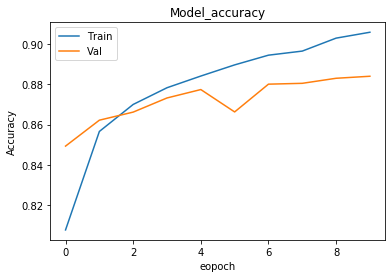

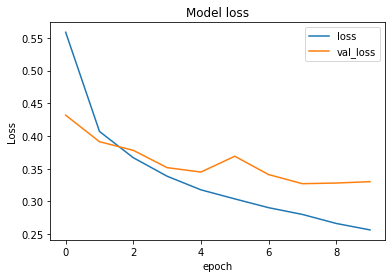

In [40]:
# ploting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('eopoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# ploting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'],loc='upper right')

after epoch 2 validation loss is increasing that mean it is case of overfitting

### Confusion matrix

In [41]:
!pip install mlxtend

In [45]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [46]:
# reset the matplotlib config 
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

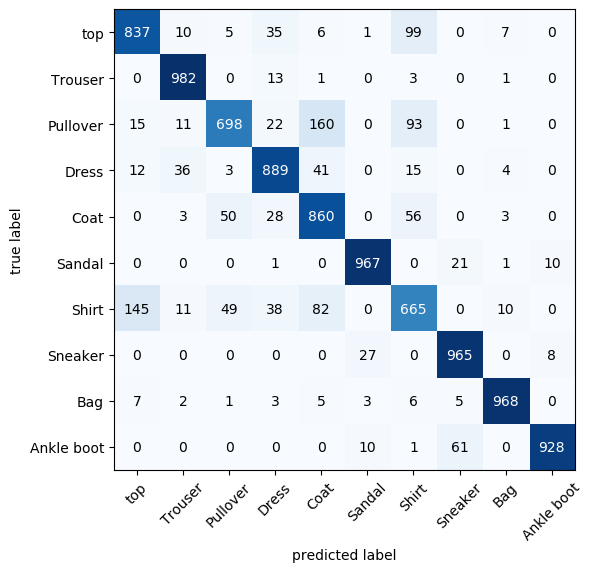

In [48]:
mat = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=mat,figsize=(6,6),class_names=class_names,show_normed=False)
plt.tight_layout()
fig.savefig('cm.png')